In [61]:
import pandas as pd
import matplotlib as mpl
import ffn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
def get_stock(sticker,start='2017-01-01',end='2020-10-02'):
    #sticker = 'SSI'
    #start = '2017-01-01'
    file = "data/" + sticker + ".csv" 
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    df.index = df['date']
    del df['date']
    del df['name']
    # Create header 2 layer
    names = df.columns.tolist()
    sub = [sticker for _ in range(len(names))]
    header = [names,sub]
    df.columns = header
    # Filter dataframe with start and end date
    df = df.loc[start:end]
    return df

In [30]:
def get_adj_portfolio(stickers,start_date='2018-01-01',end_date='2020-10-02'):
    df = pd.DataFrame()
    for i in range(len(stickers)):
        if(i==0): 
            sticker = stickers[i]
            df = get_stock(sticker,start_date,end_date)
        else:
            sticker = stickers[i]
            df1 = get_stock(sticker,start_date,end_date)
            df = df.join(df1,how='inner')
    return(df['adj_close'])


In [85]:
stickers = ['ANV','FMC','VHC','HT1','VNINDEX']
end = '2020-10-07'
start = '2016-01-01'

In [86]:
prices = get_adj_portfolio(stickers,start,end)
prices.head()
type(prices)

pandas.core.frame.DataFrame

In [87]:
prices = prices.sort_index()
prices.head()

,ANV,FMC,VHC,HT1,VNINDEX
date,,,,,
2016-01-02,2.76,10.55,12.96,17.05,540.56
2016-01-03,3.11,10.04,12.24,17.05,561.56
2016-01-04,3.07,11.73,11.69,16.46,558.43
2016-01-06,2.84,11.95,15.38,19.48,619.86
2016-01-07,2.76,13.80,20.95,19.67,640.30


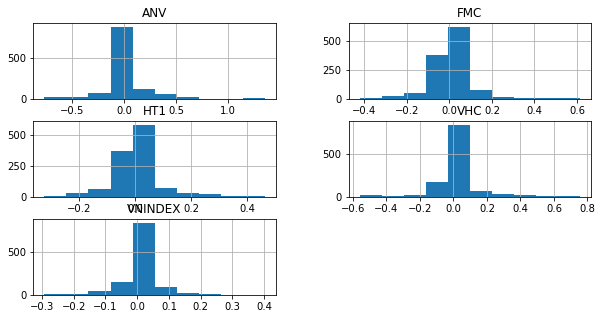

In [88]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(10, 5))

In [89]:
stats = prices.calc_stats()
stats.display()

Stat                 ANV         FMC         VHC         HT1         VNINDEX
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2016-01-02  2016-01-02  2016-01-02  2016-01-02  2016-01-02
End                  2020-10-07  2020-10-07  2020-10-07  2020-10-07  2020-10-07
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         539.49%     160.19%     180.17%     -18.77%     61.17%
Daily Sharpe         1.58        0.82        1.14        0.62        0.56
Daily Sortino        2.87        1.40        1.91        1.16        0.85
CAGR                 47.62%      22.23%      24.14%      -4.27%      10.54%
Max Drawdown         -81.31%     -54.99%     -61.93%     -62.35%     -45.26%
Calmar Ratio         0.59        0.40        0.39        -0.07       0.23

MTD                  -7.83%      -19.62%     -13.26%     -11.22%     -3.76%
3m                   2.32%       0.92%       5.40%       0.00%       0.90%
6m  

/Users/nhacheat/anaconda3/lib/python3.8/site-packages/ffn/core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


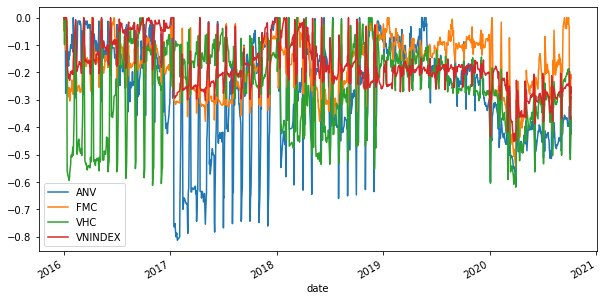

In [69]:
ax = stats.prices.to_drawdown_series().plot()

In [90]:
perf = prices.calc_stats()

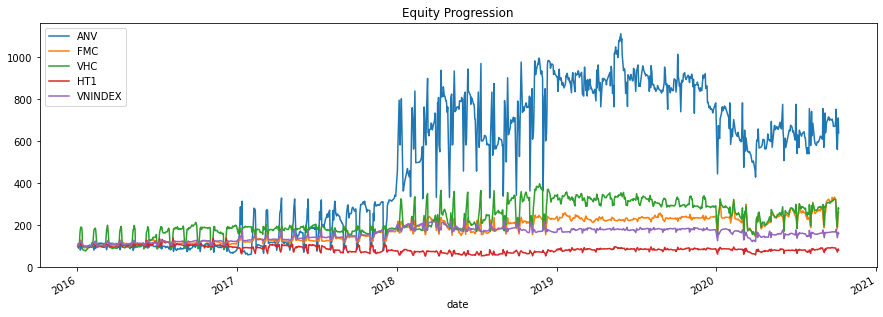

In [91]:
perf.plot()

In [92]:
print (perf.display())

Stat                 ANV         FMC         VHC         HT1         VNINDEX
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2016-01-02  2016-01-02  2016-01-02  2016-01-02  2016-01-02
End                  2020-10-07  2020-10-07  2020-10-07  2020-10-07  2020-10-07
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         539.49%     160.19%     180.17%     -18.77%     61.17%
Daily Sharpe         1.58        0.82        1.14        0.62        0.56
Daily Sortino        2.87        1.40        1.91        1.16        0.85
CAGR                 47.62%      22.23%      24.14%      -4.27%      10.54%
Max Drawdown         -81.31%     -54.99%     -61.93%     -62.35%     -45.26%
Calmar Ratio         0.59        0.40        0.39        -0.07       0.23

MTD                  -7.83%      -19.62%     -13.26%     -11.22%     -3.76%
3m                   2.32%       0.92%       5.40%       0.00%       0.90%
6m  

In [93]:
returns = prices.to_log_returns().dropna()
returns

,ANV,FMC,VHC,HT1,VNINDEX
date,,,,,
2016-01-03,0.119392,-0.049549,-0.057158,0.000000,0.038113
2016-01-04,-0.012945,0.155573,-0.045976,-0.035217,-0.005589
2016-01-06,-0.077874,0.018582,0.274334,0.168455,0.104364
2016-01-07,-0.028573,0.143937,0.309071,0.009706,0.032443
2016-01-08,-0.204300,-0.124873,0.111879,-0.026792,0.012540
...,...,...,...,...,...
2020-10-02,-0.168151,-0.047511,-0.191570,-0.013841,-0.039821
2020-10-03,-0.107708,-0.117835,-0.147374,-0.068495,-0.105548
2020-10-04,-0.017949,-0.097578,-0.110950,-0.085655,-0.099817


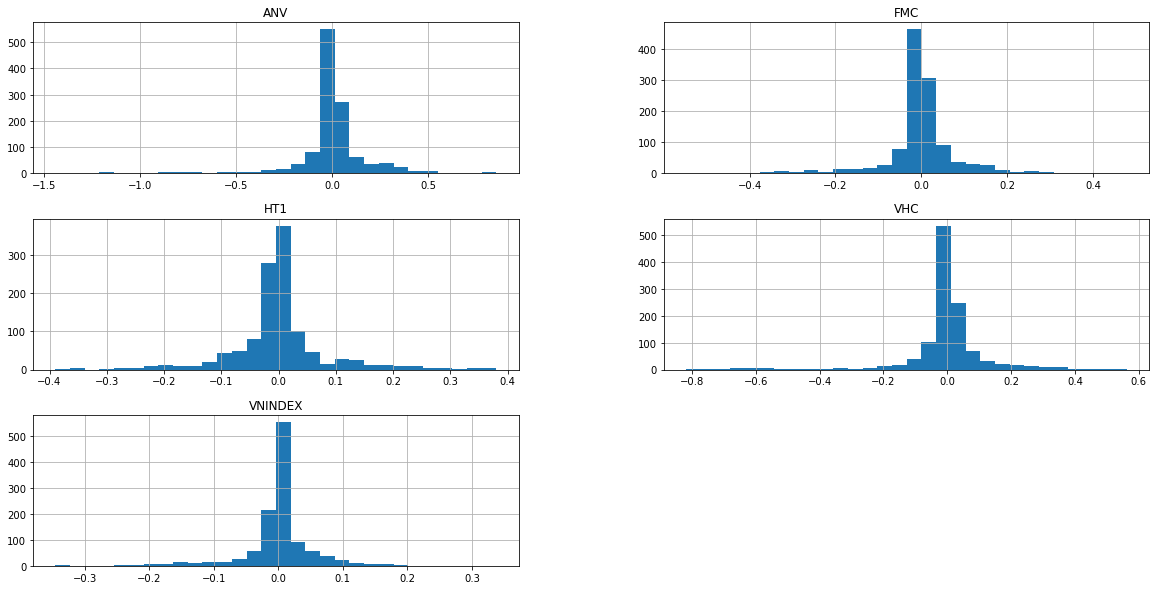

In [94]:
ax = returns.hist(figsize=(20, 10),bins=30)

In [95]:
returns.corr().as_format('.2f')

,ANV,FMC,VHC,HT1,VNINDEX
ANV,1.00,0.51,0.19,-0.06,0.46
FMC,0.51,1.00,0.47,0.32,0.66
VHC,0.19,0.47,1.00,0.38,0.38
HT1,-0.06,0.32,0.38,1.00,0.33
VNINDEX,0.46,0.66,0.38,0.33,1.00


<module 'matplotlib.pyplot' from '/Users/nhacheat/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

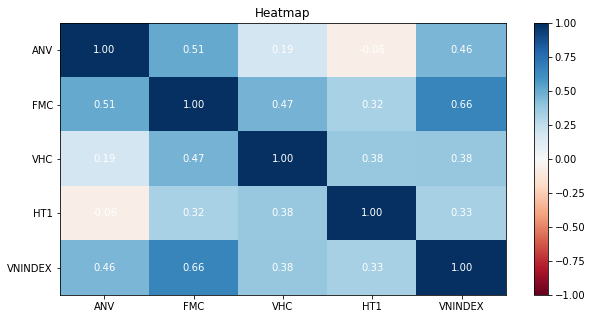

In [96]:
returns.plot_corr_heatmap()

In [97]:
returns.calc_mean_var_weights().as_format('.2%')

ANV        22.54%
FMC        42.02%
VHC        18.99%
HT1         0.00%
VNINDEX    16.44%
dtype: object

In [98]:
perf.display_lookback_returns().loc['mtd']

ANV         -7.83%
FMC        -19.62%
VHC        -13.26%
HT1        -11.22%
VNINDEX     -3.76%
Name: mtd, dtype: object

Text(0.5, 0.98, 'Return Scatter Matrix')

<Figure size 720x360 with 0 Axes>

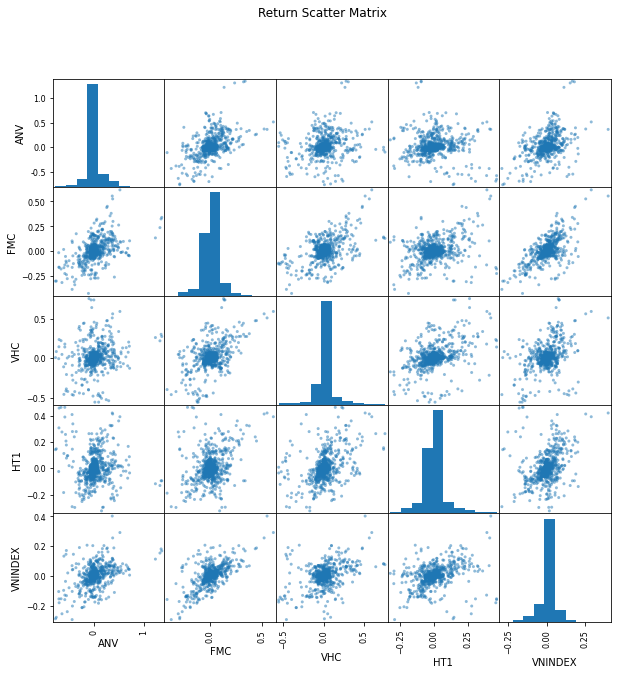

In [99]:
from pandas.plotting import scatter_matrix
#pd.plotting.scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))
perf.plot_scatter_matrix()

In [100]:
prices.describe()

,ANV,FMC,VHC,HT1,VNINDEX
count,1173.000000,1173.000000,1173.000000,1173.000000,1173.000000
mean,13.627067,19.118397,29.544834,14.700708,847.233350
std,8.942916,5.816613,9.741876,2.588709,156.017682
min,1.620000,9.600000,10.030000,8.890000,521.880000
25%,3.150000,13.300000,22.980000,12.750000,710.040000
50%,15.980000,19.000000,25.990000,14.600000,888.690000
75%,22.180000,24.370000,38.080000,16.590000,972.530000
max,30.660000,35.200000,51.460000,23.610000,1204.330000


In [101]:
returns.describe()

,ANV,FMC,VHC,HT1,VNINDEX
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000
mean,0.001583,0.000816,0.000879,-0.000177,0.000407
std,0.186105,0.085824,0.130712,0.083838,0.055767
min,-1.442029,-0.547837,-0.818063,-0.389771,-0.345533
25%,-0.024497,-0.015518,-0.019591,-0.022649,-0.007508
50%,0.000000,0.000000,0.000000,0.000000,0.001796
75%,0.037257,0.018983,0.027022,0.017583,0.012109
max,0.854902,0.479844,0.563852,0.380487,0.338140


In [82]:
perf['ANV'].display_monthly_returns()

  Year     Jan    Feb     Mar    Apr    May     Jun     Jul     Aug    Sep    Oct     Nov     Dec     YTD
------  ------  -----  ------  -----  -----  ------  ------  ------  -----  -----  ------  ------  ------
  2016    5.8    6.51   -1.29  -6.19   1.39   -9.59  -10.23    2.95  16.39   5.99  -10.96  -18.28  -20.65
  2017  -26.03  70.37   15.58   1.88  39.08   17.04   41.59  -26.44  38.66  -3.01   15.79    8.39  324.66
  2018   36.24  24.86   27.43   4.37   4.9   -11.92  -17.44    0     22.24  14.53   10.32    2.5   173.23
  2019   -4.57   1.86   -5.43   4.92  13.87   -7.13   -4.9    -5.76   5.68   0.57   -6.08   -6.94  -15.07
  2020  -15.71  -9.35  -28.26  43.28   7.08   -7.99  -10.78   12.75  13.99  -7.83    0       0     -18.21


In [83]:
perf['FMC'].display_monthly_returns()

  Year    Jan    Feb     Mar     Apr     May    Jun    Jul    Aug    Sep     Oct    Nov    Dec    YTD
------  -----  -----  ------  ------  ------  -----  -----  -----  -----  ------  -----  -----  -----
  2016   1.04  -5.82   12.95    3.44   -0.94  14.46  -7.14   3.56   0      -2.58  -5.54  -0.51  11
  2017   8.8   10.05   -4.21   -2.38    1.6   -1.2    1.44   7.34   4.12    5.29  15.47  -1.27  52.95
  2018  14.91   6.46   10.04  -18.29  -12.64  -2.44   3.99  17.58  10.57    1.1    5.05   0.17  34.84
  2019   6.71  -5.98   -4.79    1.43    0.56   3.19   2.72   4.49  -5.26    1.13  -0.76   3.03   5.71
  2020  -3.76  -9.44  -30.92   43.2    16.86   0.31  -5.04  18.37  17.76  -19.62   0      0      7.52


In [84]:
perf['VHC'].display_monthly_returns()

  Year     Jan     Feb     Mar     Apr     May    Jun     Jul    Aug    Sep     Oct     Nov    Dec     YTD
------  ------  ------  ------  ------  ------  -----  ------  -----  -----  ------  ------  -----  ------
  2016   -6.25    2.8    -6.41    5.05   17.35  39.56   15.42   5.69   5.95   -6.62  -14.42  23.01   97.15
  2017   -2.27  -18.58   17.86   -2.21    6.19   4.82  -12.19  -5.41   4.06   -8.03   13.84  -0.17   -7.79
  2018    4.12   -7.22   40.95  -15.15  -11.13  11.2    19.59   9.67  23.53   -1.17    8.52  -4.99   88.5
  2019   -3.47    3.59   -5.47    4.45   -0.84  -3.29    1.02  -9.79   1.49   -0.72   -5.83   4.21  -14.68
  2020  -11.98  -11.18  -33.86   44.87   13.14   4.45   -2.83  11.72  14.97  -13.26    0      0      -4.17


In [102]:
perf['HT1'].display_monthly_returns()

  Year    Jan    Feb     Mar     Apr    May    Jun     Jul     Aug    Sep     Oct    Nov    Dec     YTD
------  -----  -----  ------  ------  -----  -----  ------  ------  -----  ------  -----  -----  ------
  2016  -1.17   4.33   -3.75    6.62   7.26  -1.03    4.13  -10.23   2.57   -6.1   -0.46  -6      -5.4
  2017  -2.42  -5.97   19.12   -1.36  -9.49  13.02  -16.58  -21.77   6.29  -11.59  26.95  -5.78  -19.09
  2018   4.14  -2.72   -6.35  -10.5   -8.75  -4.55    4.35    6.26  17.66  -10.56   9.5    2.6    -3.07
  2019  14.31   1.24   -3.76    5.89   1.88  -2.43   -1.28   -3.14  -1.34   12.29  -6.43   1.7    18.18
  2020  -1.67  -2.04  -30.56   29     14.34  -9.15   -6.34   23.9    0.32  -11.22   0      0      -7.36
